# Tokyo Airbnb Data Analysis

This project explores pricing patterns, room types, host behavior, and geographic distribution of Airbnb listings in Tokyo, aiming to derive practical business insights relevant to the short-term rental market.

## Data Loading and Cleaning

The dataset was sourced from Inside Airbnb. Basic preprocessing steps were applied, including price normalization and removal of extreme outliers, to ensure clearer visualization and more interpretable analysis.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Hiragino Sans'


pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/listings.csv")
df['price'] = (
    df['price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df = df[df['price'] < df['price'].quantile(0.99)]
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.0,41.0,"['email', 'phone']",t,t,NaN,Taito Ku,NaN,35.698540,139.780864,Entire serviced apartment,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Room-darkening shades"", ""Body soap"", ""Carbon...",14550.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,19,35,46,261,2025-06-27,24,11,0,85,21,66,960300.0,2023-12-04,2025-04-19,4.42,4.38,4.71,4.58,4.88,4.83,4.38,M130019202,t,38,37,1,0,1.26
3,1034682682318099944,https://www.airbnb.com/rooms/1034682682318099944,20250627030533,2025-06-27,city scrape,温馨和风民宿/最大8人/独享一户建/近车站/免费WiFi/近公园神社,Welcome! We are thrilled to invite you and you...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,512010614,https://www.airbnb.com/users/show/512010614,寧月,2023-04-27,NaN,NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Kita Ku,NaN,35.755420,139.732600,Entire home,Entire home/apt,8,1.0,1 bath,3.0,6.0,"[""Room-darkening shades"", ""Cooking basics"", ""C...",22012.0,2,365,2.0,2.0,365.0,365.0,2.0,365.0,NaN,t,16,46,76,257,2025-06-27,15,12,1,174,8,72,1584864.0,2024-01-10,2025-06-08,4.73,4.87,4.60,4.73,4.87,4.60,4.73,M130036504,t,1,1,0,0,0.84
4,1034886759303593464,https://www.airbnb.com/rooms/1034886759303593464,20250627030533,2025-07-01,city scrape,"10min to SkyTree,Asakusa/Direct access to Airport","It is a new building, 10min walk to Oshiage St...",〈Around the room〉<br />◆10 minutes walk to Osh...,https://a0.muscache.com/pictures/miso/Hosting-...,149643001,https://www.airbnb.com/users/show/149643001,Sylvia,2017-09-08,"Edogawa City, Japan",Welcome to my room! \nI love to travel and hop...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/cd030...,https://a0.muscache.com/im/pictures/user/cd030...,NaN,22.0,22.0,"['email', 'phone']",t,t,"Sumida City, Tokyo Prefecture, Japan",Sumida Ku,NaN,35.715503,139.808758,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Clothing storage: closet"", ""Elevator"", ""Hair...",15429.0,5,365,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,11,39,130,2025-07-01,17,8,1,39,11,80,1234320.0

## Price Distribution

To improve visualization clarity, extreme price outliers above the 99th percentile were excluded from the analysis. This helps reveal the underlying distribution without distortion from a small number of luxury listings.

In [28]:
df.shape
df.info()
df.isnull().mean().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 23013 entries, 2 to 25296
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23013 non-null  int64  
 1   listing_url                                   23013 non-null  object 
 2   scrape_id                                     23013 non-null  int64  
 3   last_scraped                                  23013 non-null  object 
 4   source                                        23013 non-null  object 
 5   name                                          23013 non-null  object 
 6   description                                   22636 non-null  object 
 7   neighborhood_overview                         12768 non-null  object 
 8   picture_url                                   23013 non-null  object 
 9   host_id                                       23013 non-null  int6

calendar_updated                1.000000
neighbourhood_group_cleansed    1.000000
host_neighbourhood              0.731934
neighbourhood                   0.445183
neighborhood_overview           0.445183
host_location                   0.310042
host_about                      0.308347
review_scores_accuracy          0.135793
review_scores_cleanliness       0.135793
review_scores_checkin           0.135793
review_scores_value             0.135793
review_scores_communication     0.135793
review_scores_location          0.135793
first_review                    0.135619
last_review                     0.135619
review_scores_rating            0.135619
reviews_per_month               0.135619
host_is_superhost               0.063269
host_response_rate              0.049276
host_response_time              0.049276
dtype: float64

In [29]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.301300e+04,2.301300e+04,2.301300e+04,22152.000000,22152.000000,0.0,23013.000000,23013.000000,23013.000000,23005.000000,23005.000000,23007.000000,23013.000000,23013.000000,23013.000000,23002.000000,23002.000000,23002.000000,23002.000000,23013.000000,23013.000000,0.0,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,2.301300e+04,19892.000000,19888.000000,19888.000000,19888.000000,19888.000000,19888.000000,19888.000000,23013.000000,23013.000000,23013.000000,23013.000000,19892.000000
mean,8.977977e+17,2.025063e+13,3.652620e+08,30.434453,40.344168,NaN,35.697950,139.736659,4.439708,1.149250,1.396696,2.911027,17666.434407,5.185504,346.540738,4.819755,6.164594,493.929006,529.964134,5.418468,513.598762,NaN,12.344501,31.754704,53.329509,192.367401,37.985226,14.755138,1.167557,115.569678,11.775692,87.508582,1.601631e+06,4.730546,4.768386,4.716802,4.793209,4.840632,4.717593,4.672684,24.655673,22.644549,1.758528,0.207926,1.827375
std,5.266947e+17,0.000000e+00,2.105615e+08,52.212107,84.316097,NaN,0.043104,0.073337,2.888850,0.504233,1.056929,2.274355,12624.210305,9.969633,294.270031,9.235257,10.900678,382.038893,410.192281,9.712548,379.456646,NaN,9.166950,16.927266,24.083063,94.398014,67.662119,18.962008,1.727402,48.598998,19.220240,78.693764,2.161095e+06,0.322028,0.291344,0.348900,0.279861,0.263055,0.287699,0.332972,32.624585,31.781420,4.947742,2.437753,1.590418
min,1.976770e+05,2.025063e+13,3.222340e+05,1.000000,1.000000,NaN,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,1700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,6.784648e+17,2.025063e+13,1.799119e+08,4.000000,6.000000,NaN,35.687050,139.698754,2.000000,1.000000,1.000000,1.000000,9423.000000,1.000000,180.000000,1.000000,1.000000,365.000000,365.000000,1.000000,365.000000,NaN,5.000000,19.000000,36.000000,120.000000,3.000000,2.000000,0.000000,79.000000,0.000000,18.000000,2.381040e+05,4.630000,4.690000,4.610000,4.720000,4.790000,4.610000,4.570000,4.000000,2.000000,0.000000,0.000000,0.850000
50%,1.117003e+18,2.025063e+13,3.820785e+08,13.000000,16.000000,NaN,35.704230,139.727250,4.000000,1.000000,1.000000,2.000000,13891.000000,2.000000,365.000000,1.000000,2.000000,365.000000,365.000000,2.000000,365.000000,NaN,11.000000,32.000000,56.000000,197.000000,18.000000,10.000000,1.000000,123.000000,5.000000,66.000000,8.913240e+05,4.800000,4.830000,4.800000,4.870000,4.910000,4.770000,4.730000,11.000000,9.000000,0.000000,0.000000,1.540000
75%,1.301103e+18,2.025063e+13,5.483638e+08,38.000000,44.000000,NaN,35.723875,139.794280,6.000000,1.000000,2.000000,4.000000,21524.000000,2.000000,365.000000,2.000000,3.000000,731.000000,1125.000000,3.000000,1104.700000,NaN,19.000000,45.000000,73.000000,256.000000,45.000000,22.000000,2.000000,157.000000,18.000000,138.000000,2.077650e+06

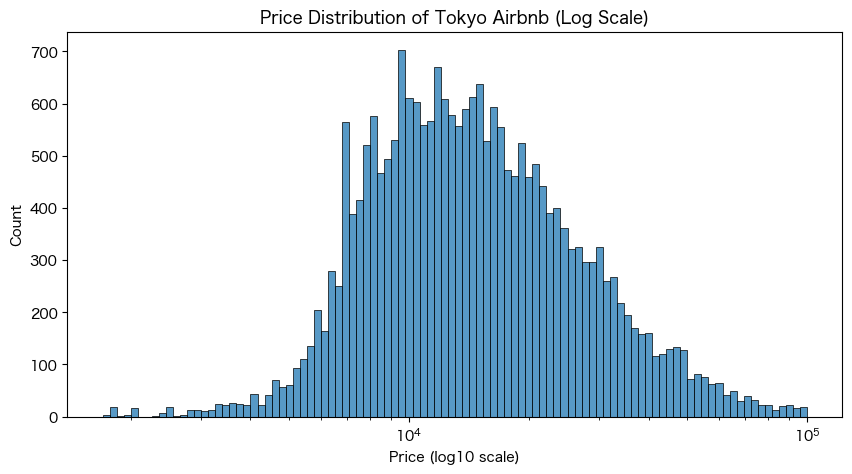

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, log_scale=True)
plt.title("Price Distribution of Tokyo Airbnb (Log Scale)")
plt.xlabel("Price (log10 scale)")
plt.show()

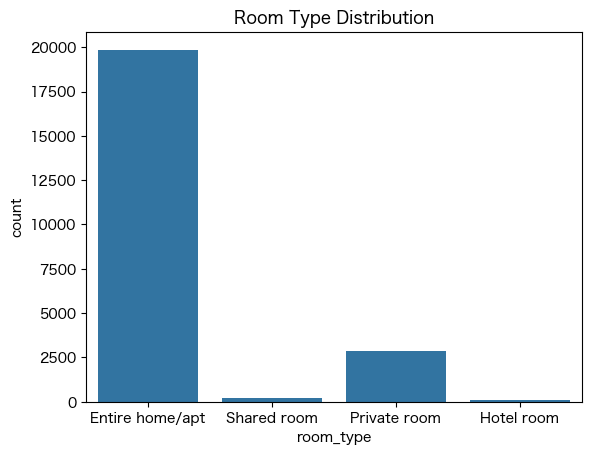

In [31]:
df['room_type'].value_counts()
sns.countplot(data=df, x='room_type')
plt.title("Room Type Distribution")
plt.show()

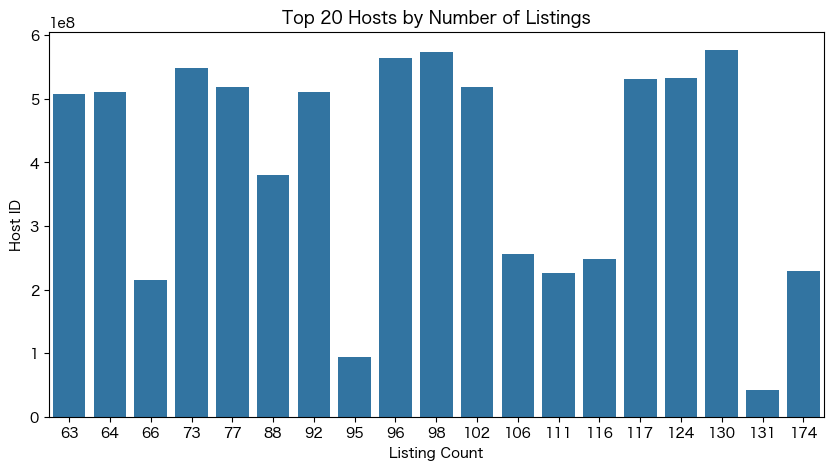

In [32]:
top_hosts = df['host_id'].value_counts().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, errorbar=None)
plt.title("Top 20 Hosts by Number of Listings")
plt.xlabel("Listing Count")
plt.ylabel("Host ID")
plt.show()

In [33]:
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

neighbourhood
Shibuya City, Tokyo To, Japan                                   86519.000000
Chiyoda City Iwamotochō, Tokyo Prefecture, Japan                63143.000000
新宿区西新宿, Tokyo, Japan                                            58000.000000
Honcho 4 Chome, Nakano, Japan                                   57090.000000
Hinohara, Nishitama District, Tokyo, Tokyo Prefecture, Japan    53932.000000
Tokyo, Shibuya, Japan                                           42174.000000
Tokyo, 東京, Japan                                                41393.000000
Shibuya-ku, Tōkyō, Japan                                        40230.500000
大田区羽田, Tokyo, Japan                                             39900.000000
Sumida City, Tokyo To, Japan                                    34779.000000
Toshima City, Tokyo,, Japan                                     33354.000000
Minato City, Tōkyō-To, Japan                                    33213.000000
Tokyo, Japan, Tokyo Prefecture, Japan                         

/Users/wangjosie/Library/Python/3.14/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from font(s) Hiragino Sans.
  fig.canvas.print_figure(bytes_io, **kw)


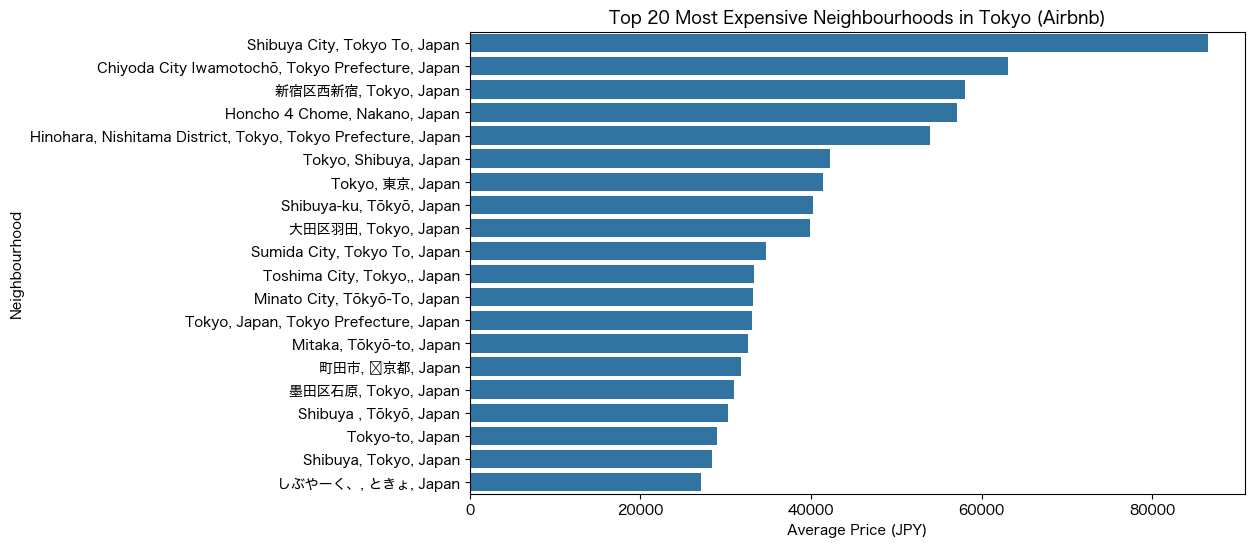

In [34]:
neigh_price = (
    df.groupby("neighbourhood")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10,6))
sns.barplot(x=neigh_price.values, y=neigh_price.index)
plt.title("Top 20 Most Expensive Neighbourhoods in Tokyo (Airbnb)")
plt.xlabel("Average Price (JPY)")
plt.ylabel("Neighbourhood")
plt.show()

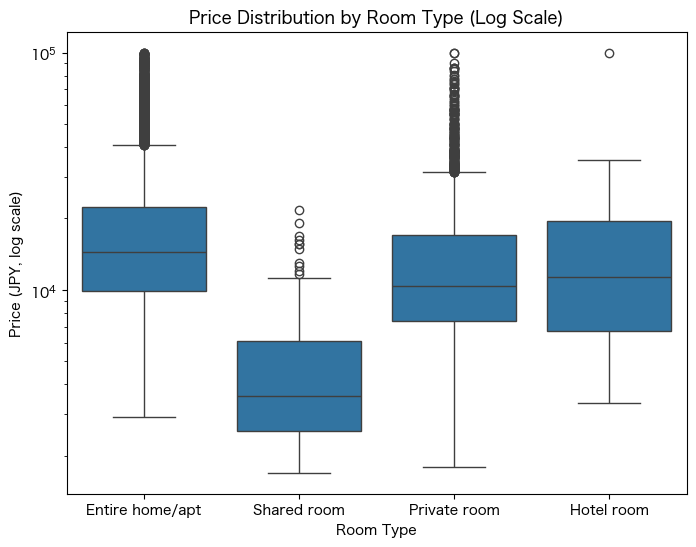

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='room_type', y='price')
plt.yscale('log')
plt.title("Price Distribution by Room Type (Log Scale)")
plt.xlabel("Room Type")
plt.ylabel("Price (JPY, log scale)")
plt.show()

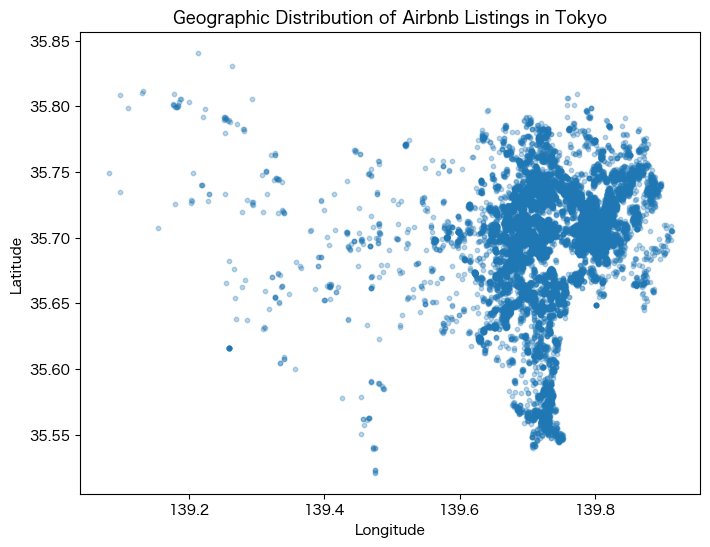

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['longitude'],
    df['latitude'],
    alpha=0.3,
    s=10
)
plt.title("Geographic Distribution of Airbnb Listings in Tokyo")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [37]:
import folium
from folium.plugins import HeatMap

m = folium.Map(
    location=[35.68, 139.76],
    zoom_start=11
)

heat_data = df[['latitude', 'longitude']].dropna().values.tolist()

HeatMap(heat_data, radius=8).add_to(m)
from IPython.display import display
display(m)

m.save("tokyo_airbnb_heatmap.html")

## Geographic Distribution of Airbnb Listings

The heatmap reveals a high concentration of Airbnb listings in central Tokyo, particularly around Shinjuku, Shibuya, and Minato wards. These areas align with major transportation hubs and tourist destinations, indicating strong demand for short-term accommodation in highly accessible locations.

## Business Insights

- Airbnb listings in Tokyo are highly concentrated in central wards and around major transportation hubs.

- Entire home/apartment listings command significantly higher prices compared to private or shared rooms, reflecting strong demand from short-term tourists.

- A small number of hosts control a disproportionately large share of listings, indicating professionalized hosting behavior.

- Price distribution exhibits a long-tail pattern, where a minority of luxury listings significantly exceed the average market price.

## Business Implications

- New hosts may face intense competition in central Tokyo and could explore opportunities in underserved outer neighborhoods.

- Platform regulators may need to monitor high-volume hosts to ensure compliance and market fairness.

- Pricing strategies should prioritize location and room-type differentiation rather than uniform pricing models.
